# Import Libraries

In [1]:
import os

import numpy as np

from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalAveragePooling2D

import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Preprocessing

In [2]:
folder_path = '/kaggle/input/face-expression-recognition-dataset/images'

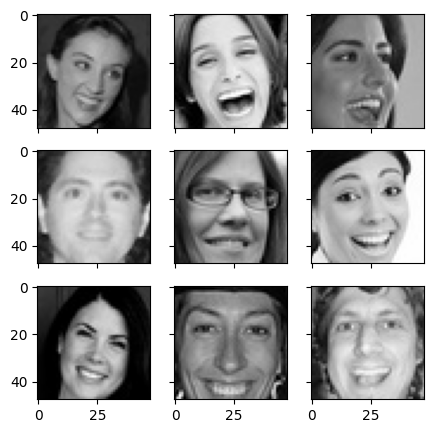

In [3]:
expression = 'happy'

fig, ax = plt.subplots(3,3,sharex=True,sharey=True,figsize=(5,5))

for i in range(3):
    for j in range(3):
        image = load_img(folder_path+'/train/'+expression+'/'+os.listdir(folder_path+'/train/'+expression)[3*i+j])
        ax[i][j].imshow(image)

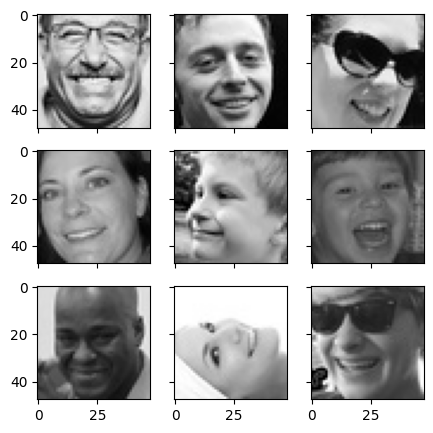

In [4]:
expression = 'happy'

fig, ax = plt.subplots(3,3,sharex=True,sharey=True,figsize=(5,5))

for i in range(3):
    for j in range(3):
        image = load_img(folder_path+'/validation/'+expression+'/'+os.listdir(folder_path+'/validation/'+expression)[3*i+j])
        ax[i][j].imshow(image)

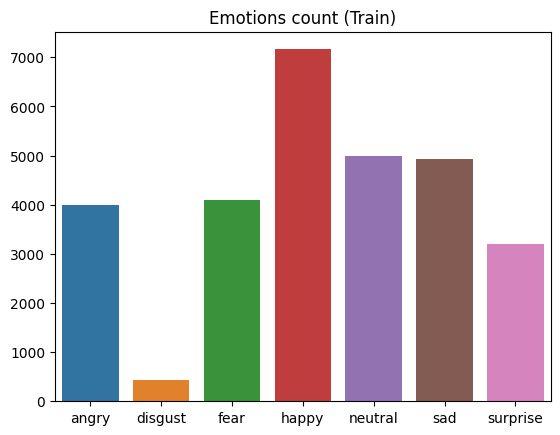

In [5]:
emotions = ['angry','disgust','fear','happy','neutral','sad','surprise']

emotion_count_train = []

for emotion in emotions:
    l = len(os.listdir(folder_path+'/train/'+emotion))
    emotion_count_train.append(l)
    
sns.barplot(x=emotions,y=emotion_count_train)
plt.title('Emotions count (Train)')
plt.show()

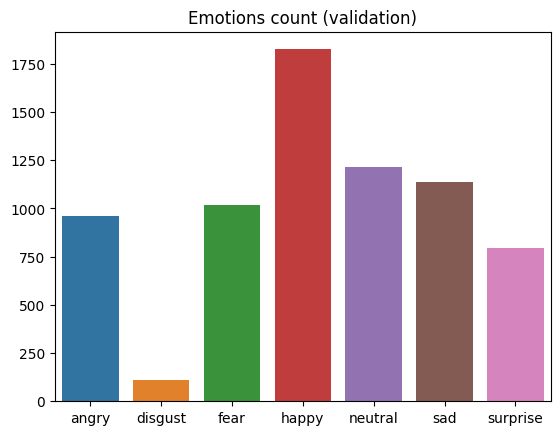

In [6]:
emotions = ['angry','disgust','fear','happy','neutral','sad','surprise']

emotion_count_test = []

for emotion in emotions:
    l = len(os.listdir(folder_path+'/validation/'+emotion))
    emotion_count_test.append(l)
    
sns.barplot(x=emotions,y=emotion_count_test)
plt.title('Emotions count (validation)')
plt.show()

In [7]:
emotion_count_train

[3993, 436, 4103, 7164, 4982, 4938, 3205]

In [8]:
np.array(emotion_count_train).sum()

28821

In [9]:
emotion_count_test

[960, 111, 1018, 1825, 1216, 1139, 797]

In [10]:
np.array(emotion_count_test).sum()

7066

**There are total 28821 images**

**We need more images so perform data augmentation**

**Combining images from all directories**

In [11]:
batch_size = 128
dimension = 48

train_img_datagen = ImageDataGenerator(rescale=1./255)
test_img_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_img_datagen.flow_from_directory(directory=folder_path+'/train',
                                                  target_size=(dimension,dimension),
                                                  color_mode='grayscale',
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
)

test_set = test_img_datagen.flow_from_directory(directory=folder_path+'/validation',
                                                  target_size=(dimension,dimension),
                                                  color_mode='grayscale',
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [12]:
type(train_set)

keras.preprocessing.image.DirectoryIterator

# Model Building

In [14]:
no_of_classes = len(emotions)

In [19]:
model = Sequential()

#Convolutional layers
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',input_shape=(dimension,dimension,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

#Fully connected layers
model.add(Dense(units=1000,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=300,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=no_of_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 128)       1280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 128)      0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 23, 23, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 10, 10, 256)      

In [21]:
history = model.fit(
    train_set,  # Your training data generator
    steps_per_epoch=train_set.n // train_set.batch_size,
    epochs=15,
    validation_data=test_set,  # Your validation data generator
    validation_steps=test_set.n // test_set.batch_size
)

Epoch 1/15


2023-10-25 17:00:09.667232: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


225/225 [==============================] - 86s 371ms/step - loss: 1.8134 - accuracy: 0.2480 - val_loss: 1.7229 - val_accuracy: 0.3003
Epoch 2/15
225/225 [==============================] - 53s 234ms/step - loss: 1.6456 - accuracy: 0.3455 - val_loss: 1.4927 - val_accuracy: 0.4200
Epoch 3/15
225/225 [==============================] - 53s 235ms/step - loss: 1.4752 - accuracy: 0.4253 - val_loss: 1.3681 - val_accuracy: 0.4805
Epoch 4/15
225/225 [==============================] - 54s 241ms/step - loss: 1.3875 - accuracy: 0.4655 - val_loss: 1.2831 - val_accuracy: 0.5065
Epoch 5/15
225/225 [==============================] - 53s 236ms/step - loss: 1.3161 - accuracy: 0.4956 - val_loss: 1.2244 - val_accuracy: 0.5361
Epoch 6/15
225/225 [==============================] - 55s 246ms/step - loss: 1.2590 - accuracy: 0.5221 - val_loss: 1.1968 - val_accuracy: 0.5446
Epoch 7/15
225/225 [==============================] - 53s 236ms/step - loss: 1.2175 - accuracy: 0.5348 - val_loss: 1.1674 - val_accuracy: 0.5

# Results

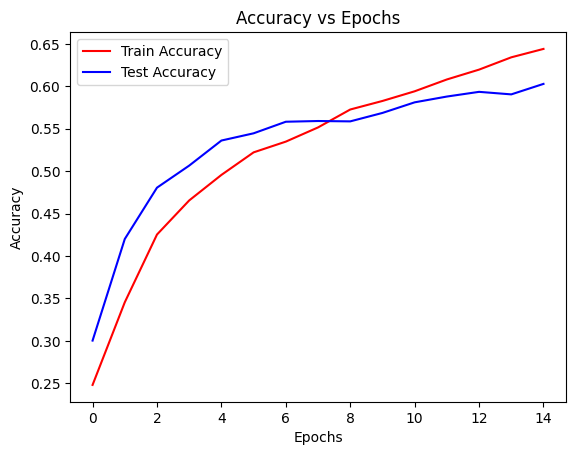

In [22]:
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

plt.plot(train_accuracy,color='red',label='Train Accuracy')
plt.plot(test_accuracy,color='blue',label='Test Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

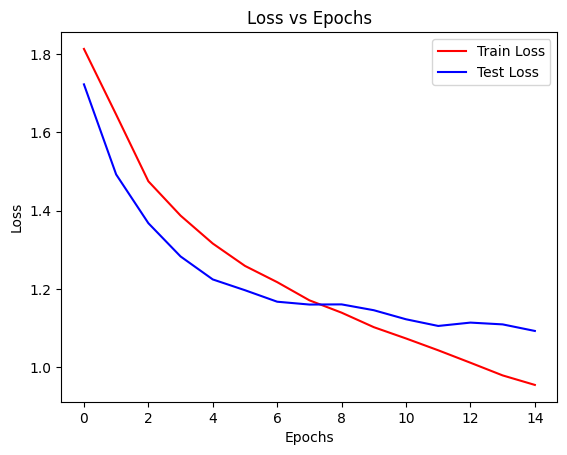

In [23]:
train_accuracy = history.history['loss']
test_accuracy = history.history['val_loss']

plt.plot(train_accuracy,color='red',label='Train Loss')
plt.plot(test_accuracy,color='blue',label='Test Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()